# Chapter 10

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2,0.5]])

In [5]:
y_pred

array([0])

### XOR solution

In [6]:
def step(x):
    return 1 if x >0 else 0

In [7]:
def xor_perceptron(arr, bias, wts_1, wts_2):
    x_11 = step(arr @ wts_1[0,:2].T + bias[0]*wts_1[0,-1])
    x_12 = step(arr @ wts_1[1,:2].T + bias[0]*wts_1[1, -1])
    
    print(x_11, x_12)
    hidden = np.array([x_11, x_12])
    
    
    out = step( hidden @ wts_2[:2].T + bias[1]*wts_2[-1])
    
    return out    

In [8]:
array = np.array([[0,0], [1,1], [0,1], [1,0]])
bias = np.array([1,1])
wts_1 = np.array([[1,1,-1.5], [1,1,-0.5]])
wts_2 = np.array([-1,1,-0.5])

In [9]:
for i in range(len(array)):
    print(xor_perceptron(array[i], bias, wts_1, wts_2))

0 0
0
1 1
0
0 1
1
0 1
1


## Building a classifier using the Sequential API

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.3.1'

In [12]:
keras.__version__

'2.4.0'

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_train.shape

(55000, 28, 28)

### Creating the model using the Sequential API

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer('dense') is hidden1

True

In [26]:
weights,biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.00638384, -0.00868036,  0.02692527, ...,  0.05918624,
         0.03220224,  0.06377846],
       [-0.04111947, -0.04777304,  0.01960474, ...,  0.06176805,
        -0.01008502,  0.00022317],
       [ 0.04639112,  0.0487331 , -0.0089742 , ...,  0.05517389,
        -0.01149741, -0.06561173],
       ...,
       [-0.07077455,  0.00534277,  0.03196858, ...,  0.04168903,
         0.06468014,  0.04547915],
       [ 0.05100968,  0.0668398 ,  0.07123232, ..., -0.01434751,
        -0.05607205, -0.0277362 ],
       [-0.02192645, -0.0662646 ,  0.02927129, ...,  0.00240985,
         0.01174528, -0.0340361 ]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

### Compile the model

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 989us/step - loss: 0.7292 - accuracy: 0.7596 - val_loss: 0.5346 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 2s 910us/step - loss: 0.4936 - accuracy: 0.8285 - val_loss: 0.4485 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 2s 922us/step - loss: 0.4478 - accuracy: 0.8426 - val_loss: 0.4105 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 2s 945us/step - loss: 0.4199 - accuracy: 0.8520 - val_loss: 0.3993 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 2s 919us/step - loss: 0.4019 - accuracy: 0.8583 - val_loss: 0.4072 - val_accuracy: 0.8526
Epoch 6/30
1719/1719 [==============================] - 2s 935us/step - loss: 0.3847 - accuracy: 0.8644 - val_loss: 0.4397 - val_accuracy: 0.8428
Epoch 7/30
1719/1719 [==============================] - 2s 917us/step - loss: 0.3723 - accuracy: 0.8683 - val_loss: 0.3708 -

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

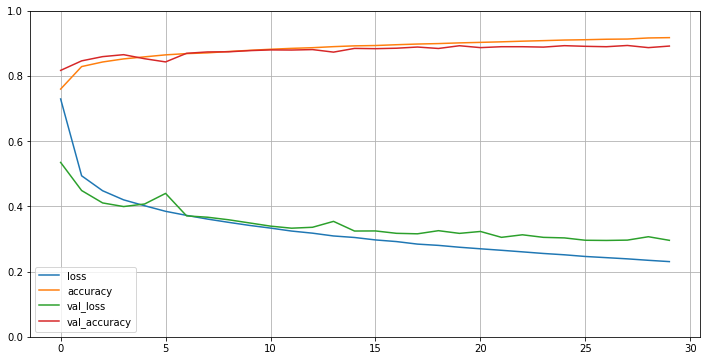

In [34]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Training error is running mean during epoch, validation error @ end of epoch

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 54.0343 - accuracy: 0.8671


[54.03425598144531, 0.8671000003814697]

### Using the model to make predictions

In [36]:
X_test = X_test/255
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [38]:
np.argmax((model.predict(X_new) > 0.5).astype('int32'), axis=-1)

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a regression MLP using the Sequential API

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
housing = fetch_california_housing()

In [42]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7889 - val_loss: 0.5790
Epoch 2/20
363/363 [==============================] - 0s 584us/step - loss: 0.5450 - val_loss: 0.5084
Epoch 3/20
363/363 [==============================] - 0s 584us/step - loss: 0.4760 - val_loss: 0.4848
Epoch 4/20
363/363 [==============================] - 0s 595us/step - loss: 0.4601 - val_loss: 0.4768
Epoch 5/20
363/363 [==============================] - 0s 573us/step - loss: 0.4510 - val_loss: 0.4682
Epoch 6/20
363/363 [==============================] - 0s 584us/step - loss: 0.4447 - val_loss: 0.4608
Epoch 7/20
363/363 [==============================] - 0s 573us/step - loss: 0.4355 - val_loss: 0.4516
Epoch 8/20
363/363 [==============================] - 0s 584us/step - loss: 0.4326 - val_loss: 0.4505
Epoch 9/20
363/363 [==============================] - 0s 573us/step - loss: 0.4259 - val_loss: 0.4498
Epoch 10/20
363/363 [==============================] - 0s 595us/step - loss: 0.4221 

In [45]:
y_pred

array([[2.0984373],
       [1.9130317],
       [1.3263563]], dtype=float32)

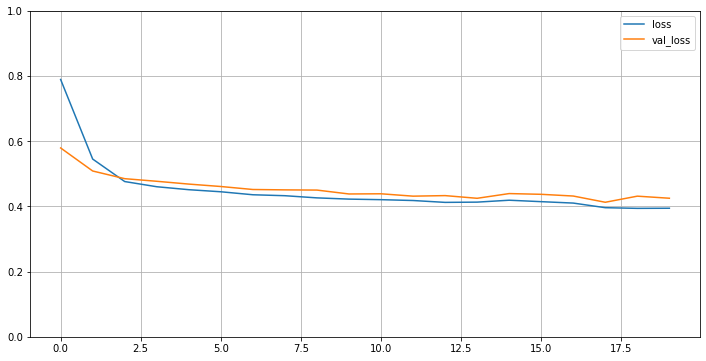

In [46]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Building complex models using the Functional API

In [47]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [48]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [49]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 826us/step - loss: 1.7705 - val_loss: 1.0203
Epoch 2/20
363/363 [==============================] - 0s 606us/step - loss: 0.8261 - val_loss: 0.7249
Epoch 3/20
363/363 [==============================] - 0s 606us/step - loss: 0.6860 - val_loss: 0.6836
Epoch 4/20
363/363 [==============================] - 0s 606us/step - loss: 0.6482 - val_loss: 0.6492
Epoch 5/20
363/363 [==============================] - 0s 617us/step - loss: 0.6195 - val_loss: 0.6238
Epoch 6/20
363/363 [==============================] - 0s 617us/step - loss: 0.5959 - val_loss: 0.6120
Epoch 7/20
363/363 [==============================] - 0s 628us/step - loss: 0.5769 - val_loss: 0.5881
Epoch 8/20
363/363 [==============================] - 0s 617us/step - loss: 0.5616 - val_loss: 0.5750
Epoch 9/20
363/363 [==============================] - 0s 606us/step - loss: 0.5487 - val_loss: 0.5660
Epoch 10/20
363/363 [==============================] - 0s 617us/step - loss: 0.536

Send different subsets of data to different paths

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B, = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], y_train, epochs=20, validation_data=([X_valid_A, X_valid_B], y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 859us/step - loss: 2.1049 - val_loss: 0.9028
Epoch 2/20
363/363 [==============================] - 0s 639us/step - loss: 0.7615 - val_loss: 0.7233
Epoch 3/20
363/363 [==============================] - 0s 650us/step - loss: 0.6604 - val_loss: 0.6589
Epoch 4/20
363/363 [==============================] - 0s 639us/step - loss: 0.6123 - val_loss: 0.6220
Epoch 5/20
363/363 [==============================] - 0s 639us/step - loss: 0.5829 - val_loss: 0.5966
Epoch 6/20
363/363 [==============================] - 0s 650us/step - loss: 0.5620 - val_loss: 0.5794
Epoch 7/20
363/363 [==============================] - 0s 650us/step - loss: 0.5465 - val_loss: 0.5636
Epoch 8/20
363/363 [==============================] - 0s 650us/step - loss: 0.5351 - val_loss: 0.5537
Epoch 9/20
363/363 [==============================] - 0s 639us/step - loss: 0.5267 - val_loss: 0.5456
Epoch 10/20
363/363 [==============================] - 0s 628us/step - loss: 0.519

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [54]:
model.compile(loss=["mse","mse"], loss_weights = [0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B, = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], [y_train,y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1395 - main_output_loss: 1.9273 - aux_output_loss: 4.0489 - val_loss: 1.0648 - val_main_output_loss: 0.8398 - val_aux_output_loss: 3.0890
Epoch 2/20
363/363 [==============================] - 0s 750us/step - loss: 0.9123 - main_output_loss: 0.7197 - aux_output_loss: 2.6456 - val_loss: 0.8383 - val_main_output_loss: 0.6960 - val_aux_output_loss: 2.1188
Epoch 3/20
363/363 [==============================] - 0s 738us/step - loss: 0.7696 - main_output_loss: 0.6350 - aux_output_loss: 1.9812 - val_loss: 0.7581 - val_main_output_loss: 0.6539 - val_aux_output_loss: 1.6960
Epoch 4/20
363/363 [==============================] - 0s 727us/step - loss: 0.7073 - main_output_loss: 0.5998 - aux_output_loss: 1.6749 - val_loss: 0.7046 - val_main_output_loss: 0.6154 - val_aux_output_loss: 1.5072
Epoch 5/20
363/363 [==============================] - 0s 727us/step - loss: 0.6719 - main_output_loss: 0.5775 - aux_output_loss: 1.5220 - 

In [55]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 543us/step - loss: 0.5229 - main_output_loss: 0.4705 - aux_output_loss: 0.9949


## Using the Subclassing API to Build Dynamic Models

In [56]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g. name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation='relu')

In [57]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.2622 - output_1_loss: 2.1470 - output_2_loss: 3.2996 - val_loss: 1.1865 - val_output_1_loss: 1.0664 - val_output_2_loss: 2.2667
Epoch 2/10
363/363 [==============================] - 0s 738us/step - loss: 0.9671 - output_1_loss: 0.8462 - output_2_loss: 2.0554 - val_loss: 0.8894 - val_output_1_loss: 0.7956 - val_output_2_loss: 1.7343
Epoch 3/10
363/363 [==============================] - 0s 727us/step - loss: 0.8230 - output_1_loss: 0.7215 - output_2_loss: 1.7367 - val_loss: 0.8084 - val_output_1_loss: 0.7269 - val_output_2_loss: 1.5424
Epoch 4/10
363/363 [==============================] - 0s 727us/step - loss: 0.7619 - output_1_loss: 0.6720 - output_2_loss: 1.5709 - val_loss: 0.7634 - val_output_1_loss: 0.6881 - val_output_2_loss: 1.4405
Epoch 5/10
363/363 [==============================] - 0s 738us/step - loss: 0.7234 - output_1_loss: 0.6403 - output_2_loss: 1.4713 - val_loss: 0.7308 - val_output_1_loss: 0.6598 

In [58]:
print(y_pred_main, '\n', y_pred_aux, '\n', total_loss, '\n', main_loss, aux_loss)

[[2.229285 ]
 [1.4665778]
 [0.8609873]] 
 [[1.8947594]
 [2.2547216]
 [1.4068943]] 
 0.6180992722511292 
 0.5530473589897156 1.2035629749298096


### Saving and restoring a model

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 804us/step - loss: 1.9026 - val_loss: 0.8032
Epoch 2/10
363/363 [==============================] - 0s 617us/step - loss: 0.6838 - val_loss: 0.6538
Epoch 3/10
363/363 [==============================] - 0s 595us/step - loss: 0.6114 - val_loss: 0.6131
Epoch 4/10
363/363 [==============================] - 0s 595us/step - loss: 0.5762 - val_loss: 0.5860
Epoch 5/10
363/363 [==============================] - 0s 595us/step - loss: 0.5504 - val_loss: 0.5641
Epoch 6/10
363/363 [==============================] - 0s 628us/step - loss: 0.5307 - val_loss: 0.5483
Epoch 7/10
363/363 [==============================] - 0s 595us/step - loss: 0.5155 - val_loss: 0.5352
Epoch 8/10
363/363 [==============================] - 0s 595us/step - loss: 0.5037 - val_loss: 0.5244
Epoch 9/10
363/363 [==============================] - 0s 584us/step - loss: 0.4935 - val_loss: 0.5159
Epoch 10/10
162/162 [==============================] - 0s 395us/step - loss: 0.471

In [62]:
model.save("my_keras_model.h5")

In [63]:
model = keras.models.load_model("my_keras_model.h5")

In [64]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [65]:
model.predict(X_new)

array([[2.31178  ],
       [1.6251962],
       [1.1134903]], dtype=float32)

In [66]:
model.save_weights("my_keras_weights.ckpt")

In [67]:
model.load_weights("my_keras_weights.ckpt")

### Using callbacks

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 837us/step - loss: 1.9026 - val_loss: 0.8032
Epoch 2/10
363/363 [==============================] - 0s 639us/step - loss: 0.6838 - val_loss: 0.6538
Epoch 3/10
363/363 [==============================] - 0s 650us/step - loss: 0.6114 - val_loss: 0.6131
Epoch 4/10
363/363 [==============================] - 0s 639us/step - loss: 0.5762 - val_loss: 0.5860
Epoch 5/10
363/363 [==============================] - 0s 628us/step - loss: 0.5504 - val_loss: 0.5641
Epoch 6/10
363/363 [==============================] - 0s 642us/step - loss: 0.5307 - val_loss: 0.5483
Epoch 7/10
363/363 [==============================] - 0s 639us/step - loss: 0.5155 - val_loss: 0.5352
Epoch 8/10
363/363 [==============================] - 0s 639us/step - loss: 0.5037 - val_loss: 0.5244
Epoch 9/10
363/363 [==============================] - 0s 705us/step - loss: 0.4935 - val_loss: 0.5159
Epoch 10/10
162/162 [==============================] - 0s 395us/step - loss: 0.471

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4792 - val_loss: 0.5019
Epoch 2/100
363/363 [==============================] - 0s 617us/step - loss: 0.4734 - val_loss: 0.4973
Epoch 3/100
363/363 [==============================] - 0s 639us/step - loss: 0.4698 - val_loss: 0.4945
Epoch 4/100
363/363 [==============================] - 0s 639us/step - loss: 0.4646 - val_loss: 0.4891
Epoch 5/100
363/363 [==============================] - 0s 628us/step - loss: 0.4612 - val_loss: 0.4851
Epoch 6/100
363/363 [==============================] - 0s 639us/step - loss: 0.4579 - val_loss: 0.4826
Epoch 7/100
363/363 [==============================] - 0s 650us/step - loss: 0.4551 - val_loss: 0.4802
Epoch 8/100
363/363 [==============================] - 0s 661us/step - loss: 0.4528 - val_loss: 0.4777
Epoch 9/100
363/363 [==============================] - 0s 650us/step - loss: 0.4497 - val_loss: 0.4746
Epoch 10/100
363/363 [==============================] - 0s 683us/step - los

In [72]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [73]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

343/363 [===========================>..] - ETA: 0s - loss: 0.3559
val/train: 1.08
363/363 [==============================] - 0s 893us/step - loss: 0.3572 - val_loss: 0.3853


## Using Tensorboard for Visualization

In [74]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [75]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [76]:
run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_02_08-07_22_08'

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [79]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 6.2460WARNING:tensorflow:From C:\Users\nbwal\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 3ms/step - loss: 1.9026 - val_loss: 0.8032
Epoch 2/30
363/363 [==============================] - 0s 683us/step - loss: 0.6838 - val_loss: 0.6538
Epoch 3/30
363/363 [==============================] - 0s 650us/step - loss: 0.6114 - val_loss: 0.6131
Epoch 4/30
363/363 [==============================] - 0s 639us/step - loss: 0.5762 - val_loss: 0.5860
Epoch 5/30
363/363 [==============================] - 0s 661us/step - loss: 0.5504 - val_loss: 0.5641
Epoch 6/30
363/363 [==============================] - 0s 650us/step - loss: 0.5307 - val_loss: 0.5483
Epoch 7/30
363/363 [=======================

In [85]:
%load_ext tensorboard
%tensorboard --logdir=.\\my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18912), started 0:01:16 ago. (Use '!kill 18912' to kill it.)

In [90]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1,1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.rand(100) + 2) * step / 100 # some random data
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)  # random 32x32 RGB images
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [93]:
tensorboard_cb = keras.callbacks.TensorBoard(test_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 4ms/step - loss: 1.9026 - val_loss: 0.8032
Epoch 2/30
363/363 [==============================] - 0s 661us/step - loss: 0.6838 - val_loss: 0.6538
Epoch 3/30
363/363 [==============================] - 0s 683us/step - loss: 0.6114 - val_loss: 0.6131
Epoch 4/30
363/363 [==============================] - 0s 661us/step - loss: 0.5762 - val_loss: 0.5860
Epoch 5/30
363/363 [==============================] - 0s 661us/step - loss: 0.5504 - val_loss: 0.5641
Epoch 6/30
363/363 [==============================] - 0s 672us/step - loss: 0.5307 - val_loss: 0.5483
Epoch 7/30
363/363 [==============================] - 0s 684us/step - loss: 0.5155 - val_loss: 0.5352
Epoch 8/30
363/363 [==============================] - 0s 672us/step - loss: 0.5037 - val_loss: 0.5244
Epoch 9/30
363/363 [==============================] - 0s 672us/step - loss: 0.4935 - val_loss: 0.5159
Epoch 10/30
363/363 [==============================] - 0s 650us/step - loss: 0.4855 

In [94]:
%tensorboard --logdir=.\\my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 18912), started 0:15:58 ago. (Use '!kill 18912' to kill it.)

## Fine-tuning Neural Network Hyperparameters

In [99]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [104]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [105]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.1991 - val_loss: 0.7120
Epoch 2/100
363/363 [==============================] - 0s 595us/step - loss: 0.6445 - val_loss: 0.6145
Epoch 3/100
363/363 [==============================] - 0s 606us/step - loss: 0.5720 - val_loss: 0.6271
Epoch 4/100
363/363 [==============================] - 0s 573us/step - loss: 0.5334 - val_loss: 0.5358
Epoch 5/100
363/363 [==============================] - 0s 595us/step - loss: 0.5092 - val_loss: 0.5165
Epoch 6/100
363/363 [==============================] - 0s 598us/step - loss: 0.4952 - val_loss: 0.5026
Epoch 7/100
363/363 [==============================] - 0s 595us/step - loss: 0.4842 - val_loss: 0.4961
Epoch 8/100
363/363 [==============================] - 0s 573us/step - loss: 0.4764 - val_loss: 0.4956
Epoch 9/100
363/363 [==============================] - 0s 606us/step - loss: 0.4651 - val_loss: 0.4823
Epoch 10/100
363/363 [==============================] - 0s 573us/step - los

In [106]:
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 975us/step - loss: 3.5055 - val_loss: 1.9213
Epoch 2/100
242/242 [==============================] - 0s 645us/step - loss: 1.3107 - val_loss: 1.0237
Epoch 3/100
242/242 [==============================] - 0s 694us/step - loss: 0.8398 - val_loss: 0.8050
Epoch 4/100
242/242 [==============================] - 0s 661us/step - loss: 0.7169 - val_loss: 0.7340
Epoch 5/100
242/242 [==============================] - 0s 678us/step - loss: 0.6732 - val_loss: 0.7062
Epoch 6/100
242/242 [==============================] - 0s 678us/step - loss: 0.6506 - val_loss: 0.6829
Epoch 7/100
242/242 [==============================] - 0s 628us/step - loss: 0.6344 - val_loss: 0.6693
Epoch 8/100
242/242 [==============================] - 0s 711us/step - loss: 0.6211 - val_loss: 0.6550
Epoch 9/100
242/242 [==============================] - 0s 628us/step - loss: 0.6100 - val_loss: 0.6491
Epoch 10/100
242/242 [==============================] - 0s 678us/step - l

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000028C682D2760>, as the constructor either does not set or modifies parameter learning_rate

In [108]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [109]:
rnd_search_cv.best_score_

-0.32221129536628723

In [114]:
# rnd_search_cv.best_estimator_
# Throws an AttributeError